In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("data/glass.csv")
df.shape

(214, 10)

In [4]:
# Detect observations with more than one outlier
from collections import Counter
def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

In [5]:
features = df.columns[:-1].tolist()
print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[features]))))

The dataset contains 14 observations with more than 2 outliers


In [6]:
outlier_indices = outlier_hunt(df[features])
df = df.drop(outlier_indices).reset_index(drop=True)
print(df.shape)

(200, 10)


In [7]:
X = df.drop("Type", axis = 1)
y = df["Type"]

In [8]:
X.shape

(200, 9)

In [9]:
y.shape

(200,)

In [10]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


___
## Decision-Tree Classifier

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((150, 9), (150,), (50, 9), (50,))

In [12]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
model_score_train = model.score(X_train, y_train)
model_score_test = model.score(X_test, y_test)
print('The accuracy of the DT classifier is {:.2f} on training data'.format(model.score(X_train, y_train)))
print('The accuracy of the DT classifier is {:.2f} on test data'.format(model.score(X_test, y_test)))

The accuracy of the DT classifier is 1.00 on training data
The accuracy of the DT classifier is 0.60 on test data


In [13]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[10  2  5  0  0  1]
 [ 3 11  2  1  1  0]
 [ 0  3  1  0  0  0]
 [ 0  0  0  2  0  1]
 [ 0  1  0  0  1  0]
 [ 0  0  0  0  0  5]]
0.6


In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.77      0.56      0.65        18
           2       0.65      0.61      0.63        18
           3       0.12      0.25      0.17         4
           5       0.67      0.67      0.67         3
           6       0.50      0.50      0.50         2
           7       0.71      1.00      0.83         5

   micro avg       0.60      0.60      0.60        50
   macro avg       0.57      0.60      0.57        50
weighted avg       0.65      0.60      0.62        50



Text(0.5,15,'Predicted label')

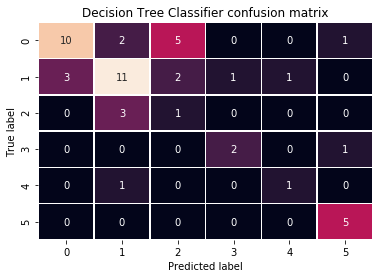

In [17]:
cfm = confusion_matrix(y_test, y_pred)

sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

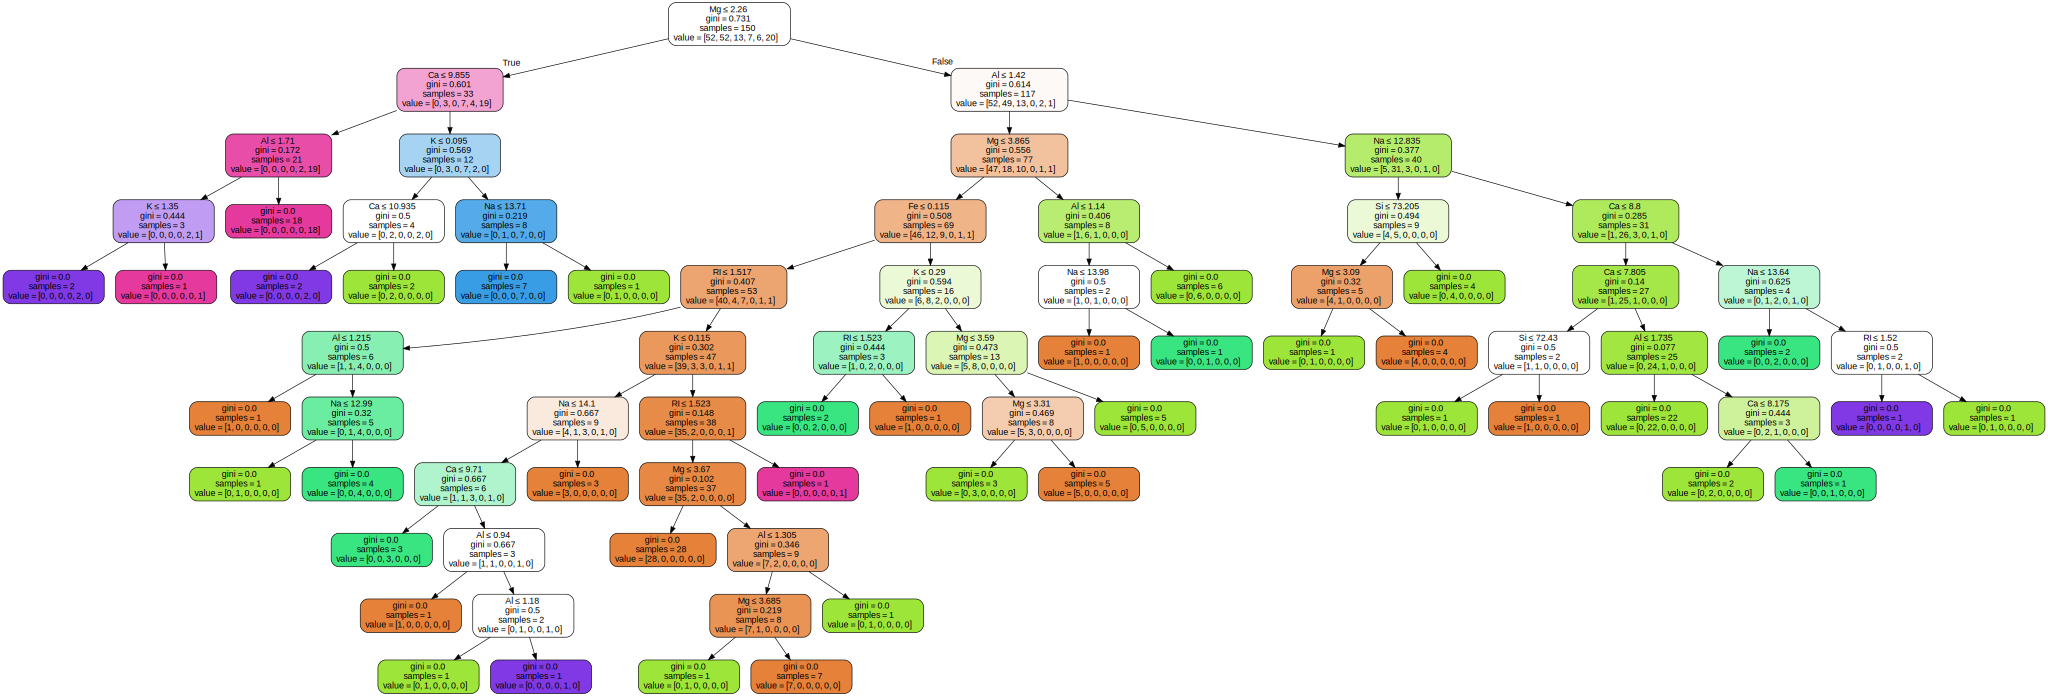

In [26]:
# conda install python-graphviz
from IPython.display import Image

dot_data = export_graphviz(model, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("DT.pdf")
graph